In [40]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#classifiers 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


#other
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


%matplotlib inline

In [17]:
X = np.asmatrix(pd.read_csv("../results/fifa_features.csv"))
print("The shape of the feature matrix is: ", X.shape, "\nEach row representing a player, each column representing a feature.")

y = np.asarray(pd.read_csv("../results/fifa_target.csv"))
print("The shape of the target matrix is : ", y.shape, "\nEach row representing a player, column values are respective leagues.")
y = y.flatten()

target_values = pd.read_csv("../results/target_reminder.csv")

The shape of the feature matrix is:  (5314, 166) 
Each row representing a player, each column representing a feature.
The shape of the target matrix is :  (5314, 1) 
Each row representing a player, column values are respective leagues.


In [18]:
#Creating train-test split and testing random forests with different depth
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.20, random_state=1)

0.15047021943573669

In [19]:
#finding ideal hyperparameters with gridSearchCV

neighbor_params = {'n_neighbors': np.arange(1,15,1)}

neighbor_model = KNeighborsClassifier()
neighbor_search = GridSearchCV(neighbor_model, neighbor_params)

neighbor_search.fit(Xtrain, ytrain)

print("The best combination of parameters was", neighbor_search.best_params_, "leading to a cross-val score of: ", neighbor_search.best_score_)



The best combination of parameters was {'n_neighbors': 13} leading to a cross-val error of:  0.183382629739


In [59]:
#trying to find optimal number of features using gridsearch cv and association approach

cv_list = []
index_list = []

for i in range(40, 80, 5):
    X_new = SelectKBest(chi2, k=i).fit_transform(X, y)
    Xtrain_t, Xval_t, ytrain_t, yval_t = train_test_split(X_new, y, test_size=0.20, random_state=1)

    neighbor_trimmed_params = {'n_neighbors': np.arange(1,15,1)}

    neighbor_trimmed_model = KNeighborsClassifier()
    neighbor_trimmed_search = GridSearchCV(neighbor_trimmed_model, neighbor_trimmed_params)
    neighbor_trimmed_search.fit(Xtrain_t, ytrain_t)
    cv_list.append(neighbor_trimmed_search.best_score_)
    index_list.append(i)
    

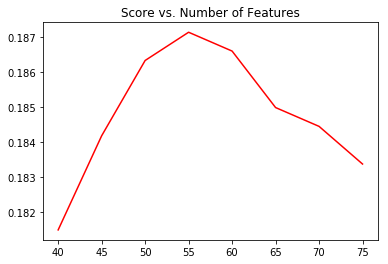

In [62]:
#plotting the two errors in relation to tree_depth. 
# cv error: red 


plt.plot(index_list, cv_list,"r")
plt.title('Score vs. Number of Features')
    

In [64]:
#Reducing dimensionality by removing features independent from target

#chi2

X_new = SelectKBest(chi2, k=55).fit_transform(X, y)

Xtrain_t, Xval_t, ytrain_t, yval_t = train_test_split(X_new, y, test_size=0.20, random_state=1)

neighbor_trimmed_params = {'n_neighbors': np.arange(1,15,1)}

neighbor_trimmed_model = KNeighborsClassifier()
neighbor_trimmed_search = GridSearchCV(neighbor_trimmed_model, neighbor_trimmed_params)

neighbor_trimmed_search.fit(Xtrain_t, ytrain_t)

print("The best combination of parameters was", neighbor_trimmed_search.best_params_, "leading to a cross-val error of: ", neighbor_trimmed_search.best_score_)

print("This is a very slight improvement over the initial model using all parameters")

The best combination of parameters was {'n_neighbors': 13} leading to a cross-val error of:  0.185132909904
This is a very slight improvement over the initial model using all parameters
